In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) =  fashion_mnist.load_data()

class_name = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']

In [3]:
train_images[0,23,23]

194

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images ,test_images = train_images / 255.0, test_images / 255.0

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-07-04 12:09:36.753434: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-04 12:09:36.753813: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=2)

Epoch 1/2


2022-07-04 12:09:37.895813: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-04 12:09:38.471468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 34s 17ms/step - loss: 0.4982 - accuracy: 0.8248
Epoch 2/2
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3772 - accuracy: 0.8633


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

2022-07-04 12:10:42.303126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 3s - loss: 0.4003 - accuracy: 0.8530 - 3s/epoch - 11ms/step


 33/313 [==>...........................] - ETA: 1s

2022-07-04 12:10:45.501532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step
Sandal


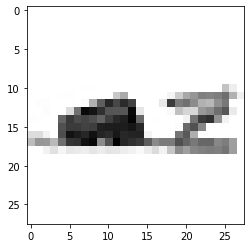

In [10]:
IMG_INDEX = 420
predictions = model.predict(test_images)
plt.imshow(test_images[IMG_INDEX], cmap=plt.cm.binary)
print(class_name[np.argmax(predictions[IMG_INDEX])])
